In [1]:
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from analysis_count import read_n, classify_imgs2
import matplotlib.pyplot as plt
import operator
%matplotlib inline

['/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py', '-f', 'true', 'true', 'true', 'true', 'true', 'model_runs/-f/count_log.csv', 'model_runs/-f/countmodel_0.ckpt', 'model_runs/-f/countmodel_', 'true', 'false', 'false', 'true']
Instructions for updating:
Use `argmax` instead
Instructions for updating:
Use `argmax` instead
Instructions for updating:
Use `argmax` instead
Instructions for updating:
Use `argmax` instead
Instructions for updating:
Use `argmax` instead
Instructions for updating:
Use `argmax` instead
Instructions for updating:
Use `argmax` instead
Instructions for updating:
Use `argmax` instead
Instructions for updating:
Use `argmax` instead
Instructions for updating:
Use `argmax` instead
Instructions for updating:
Use `argmax` instead
Instructions for updating:
Use `argmax` instead
Instructions for updating:
Use `argmax` instead
Instructions for updating:
Use `argmax` instead
Instructions for updating:
Use `argmax` instead
Instructions for updating:
Use `argmax` 

In [2]:
model_name = "1231_9blobs"
num_runs = 1
iter_list = [0, 400, 800, 1600, 3200, 6400, 12800, 25600, 51200, 102400, 153600, 204800, 307200, 409600, 614400, 819200, 1000000, 2000000, 3000000, 4000000]
             #[0, 1000, 4000, 16000, 32000, 64000, 125000, 250000, 500000, 600000]
#iter_list = np.arange(0,11100000,100000)
glimpse_list = np.arange(0,10,1)
max_blobs = 9
min_blobs = 1

num_iters = len(iter_list)
num_glimpses = len(glimpse_list)
blob_list = np.arange(0,10,1)
output_size = max_blobs - min_blobs + 2 # 10
data_directory = "data/" + model_name + "/"
m = 0.5
num_imgs = 9000
confidence_all_runs = np.zeros([num_runs, num_iters, output_size-1, num_glimpses, 1, output_size]) 
choice_all_runs = np.zeros([num_runs, num_iters, output_size-1, num_glimpses, 1, output_size])
countword_all_runs = np.zeros([num_runs, num_iters, num_imgs, output_size+1])

In [3]:
def fill_matrix(path, iteration):
    """Fill the confidence and choice matrices for one run at one iteration."""
    
    data = None
    num_imgs = 9000 # batch_size
    imgs_data = classify_imgs2(iteration, True, num_imgs, path=path) # new_imgs = True
        
    confidence_one_run = np.zeros([output_size-1, num_glimpses, 1, output_size])
    choice_one_run = np.zeros([output_size-1, num_glimpses, 1, output_size])
    countword_one_run = np.zeros([num_imgs, output_size+1])
    
    for nb in range(output_size-1):
        confidence_hist = np.zeros([num_glimpses, 1, output_size])
        choice_hist = np.zeros([num_glimpses, 1, output_size])
        num_imgs_with_num_blobs = 0.00001
        
        for idx, data in enumerate(imgs_data):
            if data["label"][nb] == 1: # data is for an image with nb+1 blobs
                num_imgs_with_num_blobs += 1
                countword_one_run[idx][0]=nb+1
                
                for g, glimpse in enumerate(glimpse_list):
                    # Histogram of softmaxes
                    confidence_hist[glimpse] += data["classifications"][glimpse]
                    # Histogram of choices
                    choice = np.argmax(data["classifications"][glimpse])
                    choice_list = [0] * (output_size)
                    choice_list[choice] = 1
                    choice_hist[glimpse] += choice_list
                    # Count Word
                    countword_one_run[idx][glimpse+1]=choice
                    
        confidence_hist = confidence_hist / num_imgs_with_num_blobs
        confidence_one_run[nb] = confidence_hist.tolist()
        choice_hist = choice_hist / num_imgs_with_num_blobs
        choice_one_run[nb] = choice_hist.tolist()
    return imgs_data, confidence_one_run, choice_one_run, countword_one_run

In [4]:
for run in range(num_runs):
    path = 'model_runs/' + model_name # '_run_' + str(run + 1) 
#     path = 'model_runs/DRAM_test_square'
    for i, iteration in enumerate(iter_list):
        imgs_data, confidence_all_runs[run, i], choice_all_runs[run, i], countword_all_runs[run, i] = fill_matrix(path, iteration)

INFO:tensorflow:Restoring parameters from model_runs/1231_9blobs/countmodel_0.ckpt
INFO:tensorflow:Restoring parameters from model_runs/1231_9blobs/countmodel_400.ckpt
INFO:tensorflow:Restoring parameters from model_runs/1231_9blobs/countmodel_800.ckpt
INFO:tensorflow:Restoring parameters from model_runs/1231_9blobs/countmodel_1600.ckpt
INFO:tensorflow:Restoring parameters from model_runs/1231_9blobs/countmodel_3200.ckpt
INFO:tensorflow:Restoring parameters from model_runs/1231_9blobs/countmodel_6400.ckpt
INFO:tensorflow:Restoring parameters from model_runs/1231_9blobs/countmodel_12800.ckpt
INFO:tensorflow:Restoring parameters from model_runs/1231_9blobs/countmodel_25600.ckpt
INFO:tensorflow:Restoring parameters from model_runs/1231_9blobs/countmodel_51200.ckpt
INFO:tensorflow:Restoring parameters from model_runs/1231_9blobs/countmodel_102400.ckpt
INFO:tensorflow:Restoring parameters from model_runs/1231_9blobs/countmodel_153600.ckpt
INFO:tensorflow:Restoring parameters from model_runs

In [5]:
# COUNT WORD
num_imgs = 9000
confidence_one_run = np.zeros([output_size-1, num_glimpses, 1, output_size])
choice_one_run = np.zeros([output_size-1, num_glimpses, 1, output_size])
countword_one_run = np.zeros([num_imgs, output_size+1])
    
for nb in range(output_size-1):
    confidence_hist = np.zeros([num_glimpses, 1, output_size])
    choice_hist = np.zeros([num_glimpses, 1, output_size])
    num_imgs_with_num_blobs = 0.00001
        
    for idx, data in enumerate(imgs_data):
        if data["label"][nb] == 1: # data is for an image with nb+1 blobs
            num_imgs_with_num_blobs += 1
            countword_one_run[idx][0]=nb+1 
            for g, glimpse in enumerate(glimpse_list):
                # Histogram of softmaxes
                confidence_hist[glimpse] += data["classifications"][glimpse]
                # Histogram of choices
                choice = np.argmax(data["classifications"][glimpse])
                countword_one_run[idx][glimpse+1]=choice
                choice_list = [0] * (output_size)
                choice_list[choice] = 1
                choice_hist[glimpse] += choice_list

In [6]:
sort_cws = np.zeros([num_runs, num_iters, num_imgs, output_size+1])

for i in range(num_runs):
    for j in range(num_iters):
        sort_cws[i][j]=sorted(countword_all_runs[i, j, :], key = operator.itemgetter(0,1,2,3,4,5,6,7,8,9,10), reverse = False) # sorted count words

stop_idx=np.zeros([num_runs, num_iters, num_imgs])

for i in range(num_runs):
    for j in range(num_iters):
        for k in range (num_imgs):
            for p in range (1, output_size+1):
                if sort_cws[i][j][k][p]==0: # record end position
                    stop_idx[i][j][k]=p
                    break # stop at the first zero 
            

results=np.zeros([num_runs, num_iters, 9, 11]) 

for i in range(num_runs):
    for j in range(num_iters):
        for k in range(num_imgs):
            # not-well-formed
            if stop_idx[i][j][k]==0:
                results[i][j][k//1000][10]+=1
            else:
                for p in range(1,int(stop_idx[i][j][k])): 
                    if p!=sort_cws[i][j][k][p]:
                        results[i][j][k//1000][10]+=1
                        break            
            # all zeros
            if stop_idx[i][j][k]==1:
                results[i][j][k//1000][0]+=1
            # Others
            elif stop_idx[i][j][k]!=0:
                idx=int(max(sort_cws[i][j][k][1:int(stop_idx[i][j][k])+1]))
                results[i][j][k//1000][idx]+=1

In [7]:
def plot_count_results(run, it):
    """Plot the count heatmap."""
    matrix = np.zeros([9,11])
    matrix = results[run, it]
    plot_title = "Count at Run %d after %d Iters" % (run + 1, iter_list[it])
    plot_count_heatmap(matrix, plot_title)

def plot_count_heatmap(matrix, plot_title):
    """Plot heatmap."""
    labels_1 = ["0","1","2","3","4","5","6","7","8","9","NWF"]
    labels_2 = ["1","2","3","4","5","6","7","8","9"]
    data = [go.Heatmap(
        z=matrix,
        colorscale="Jet",
    )]

    layout = go.Layout(
        title=plot_title,
        xaxis=dict(
            range=[0 - m, 11 + m],
            title="Count Results",
            #dtick=1,
            tickangle=0,
            ticktext=labels_1,
            tickvals=[i * 1 for i in range(len(labels_1))],
            tickcolor='#FFF'
        ),
        yaxis=dict(
            range=[0 - m, 8 + m],
            title="True Class",
            #dtick=1,
            ticktext=labels_2,
            tickvals=[i * 1 for i in range(len(labels_2))],
            tickcolor='#FFF'
        ),        
        width=500,
        height=500,
        plot_bgcolor="#000",
        paper_bgcolor="#000",
        font=dict(
            color="#FFF"
        ),
        titlefont=dict(
            color="#FFF"
        ),
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

def plot_count_results(run, it):
    """Plot the count heatmap."""
    matrix = np.zeros([9,11])
    for g in range (num_runs):
        matrix = results[run, it]
        plot_title = "Count at Run %d after %d Iters" % (run + 1, iter_list[it])
    plot_count_heatmap(matrix, plot_title)

In [8]:
for run in range(num_runs):
    for it in range(num_iters):
        plot_count_results(run,it)

In [9]:
import plotly
plotly.tools.set_credentials_file(username='mtfang0707', api_key='18LL0DZ6dDhgqxIQ3yPQ')
import plotly.plotly as py
import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(results[0][4])
#py.iplot(fig)

In [10]:
def plot_count_results_wv(run, it):
    """Plot the count heatmap with values."""
    data = results[run, it]
    title = "Count at Run %d after %d Iters" % (run + 1, iter_list[it])
    xlabel= "Count Results"
    ylabel="True Class"
    plt.figure(figsize=(output_size+1, output_size-1))
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=15)
    plt.ylabel(ylabel, fontsize=15)
    c = plt.pcolor(data, edgecolors='k', linewidths=2, cmap='Reds', vmin=0, vmax=1000)
    xbars = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'NWF')
    x_pos=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5,9.5,10.5]
    plt.xticks(x_pos, xbars, fontsize='10', horizontalalignment='center')
    ybars = ('1', '2', '3', '4', '5', '6', '7', '8', '9')
    y_pos=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]
    plt.yticks(y_pos, ybars, fontsize='10', horizontalalignment='center')
 
    def show_values(pc, fmt="%.0f", **kw):
        pc.update_scalarmappable()
        ax = pc.get_axes()
        for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
            x, y = p.vertices[:-2, :].mean(0)
            color = (0.0, 0.0, 0.0) # value color
            ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kw)

    show_values(c)
    plt.colorbar(c)

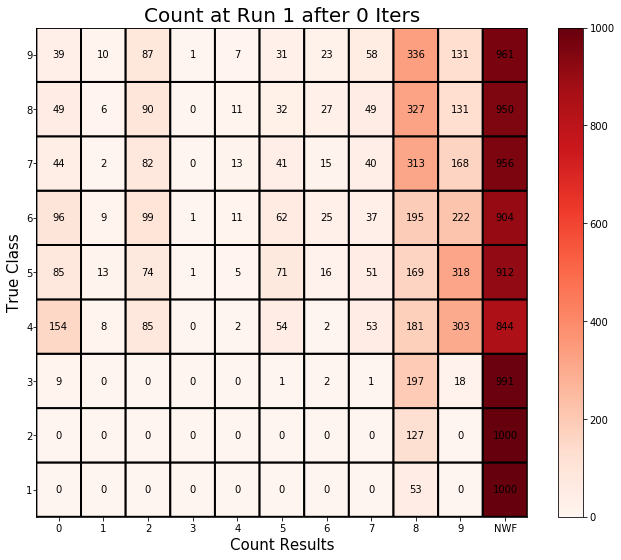

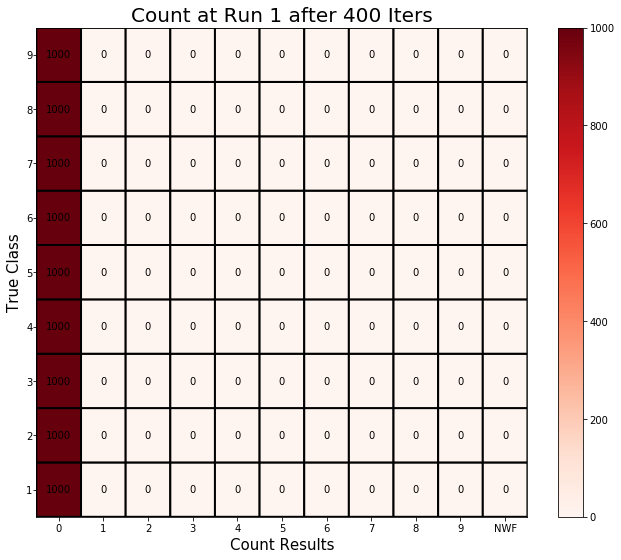

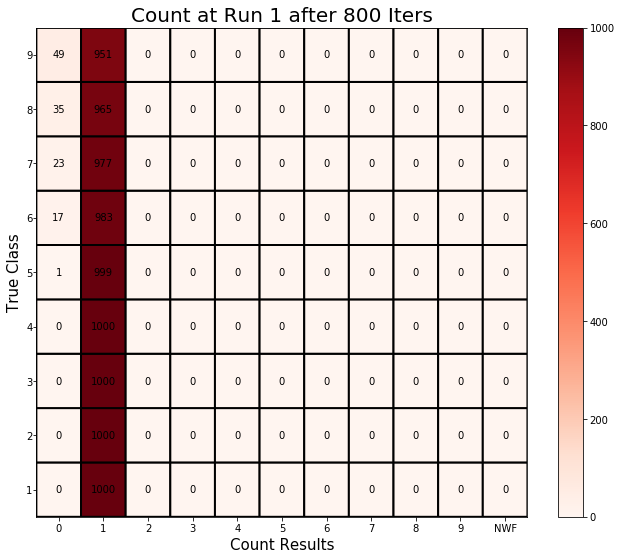

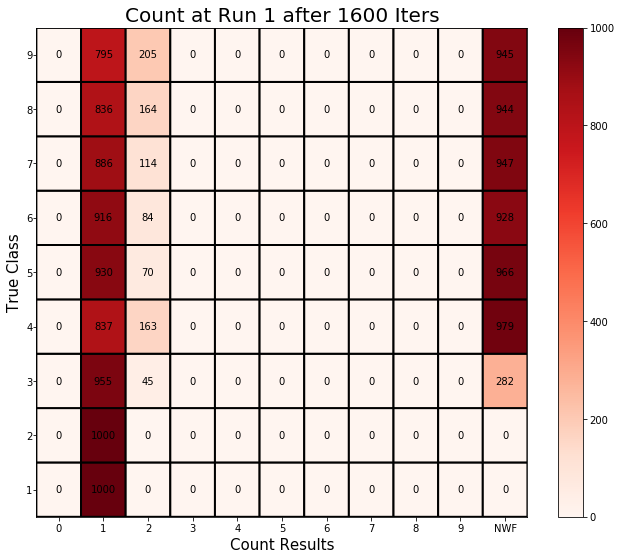

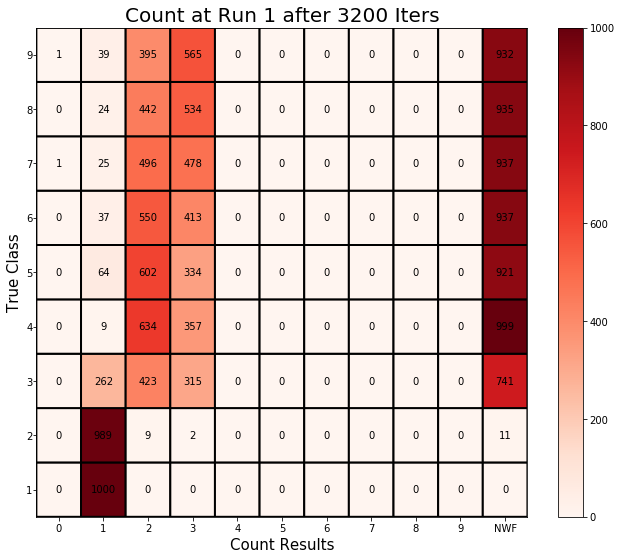

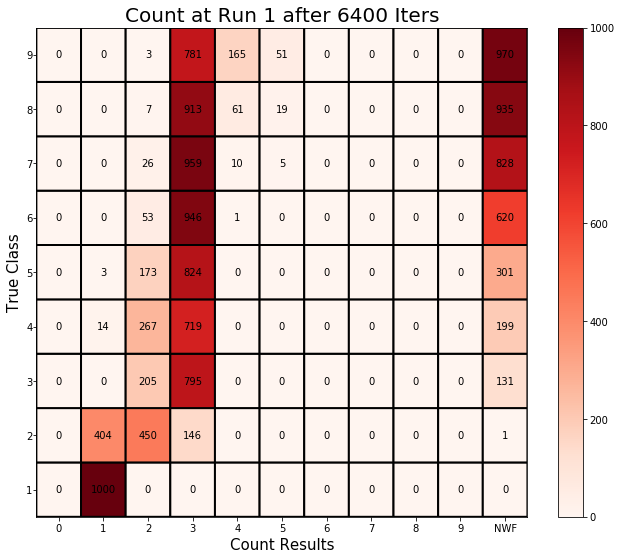

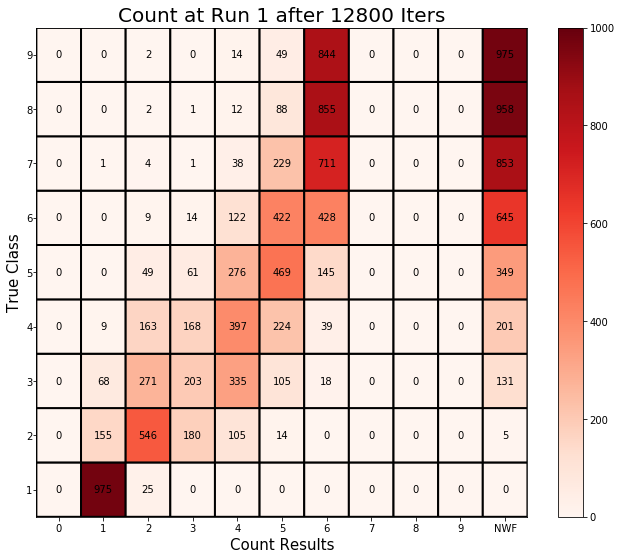

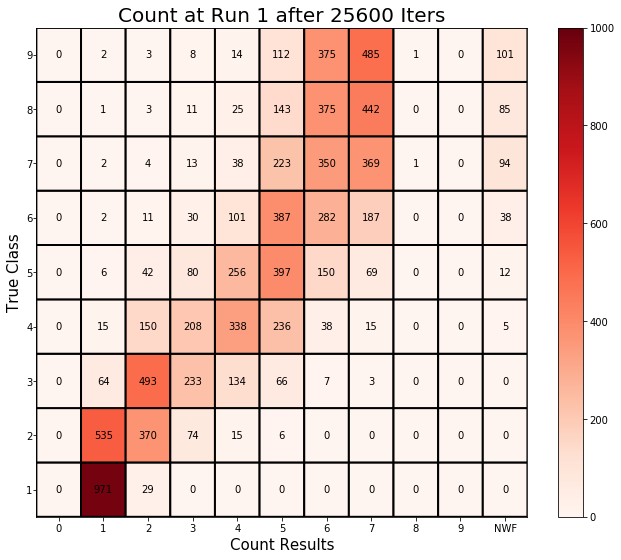

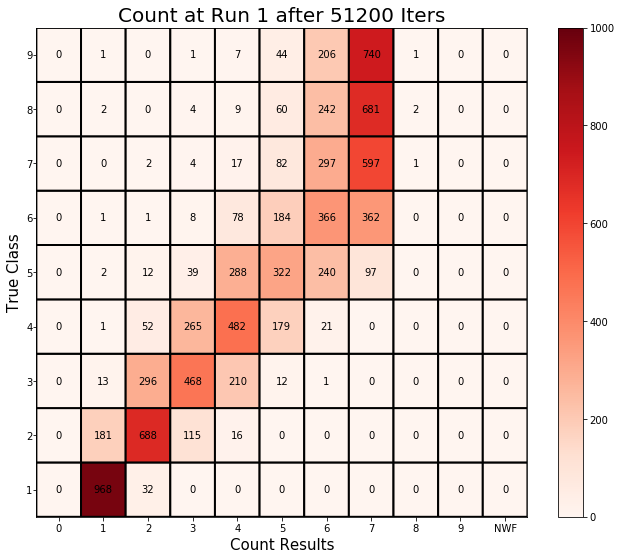

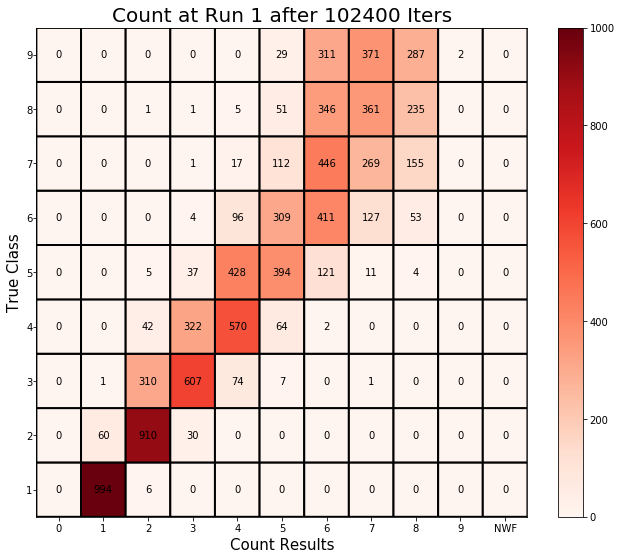

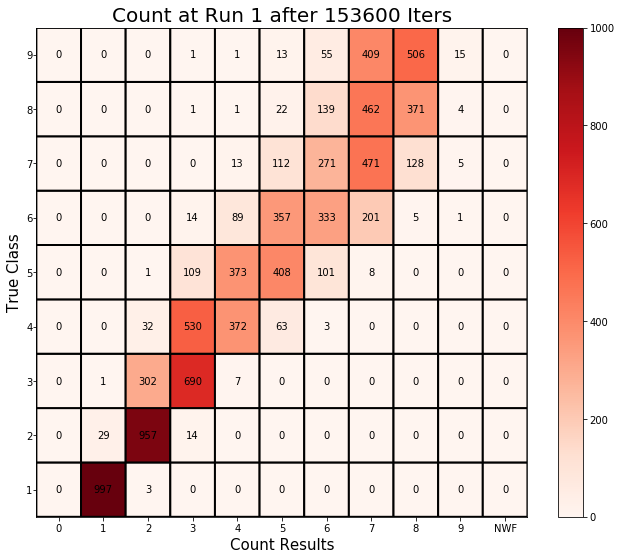

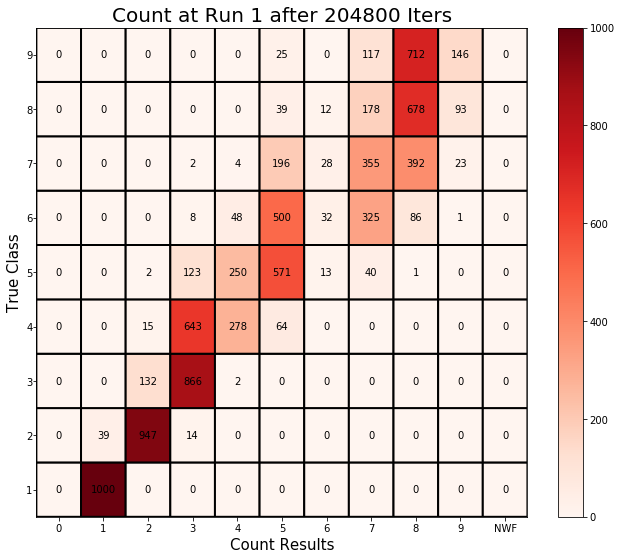

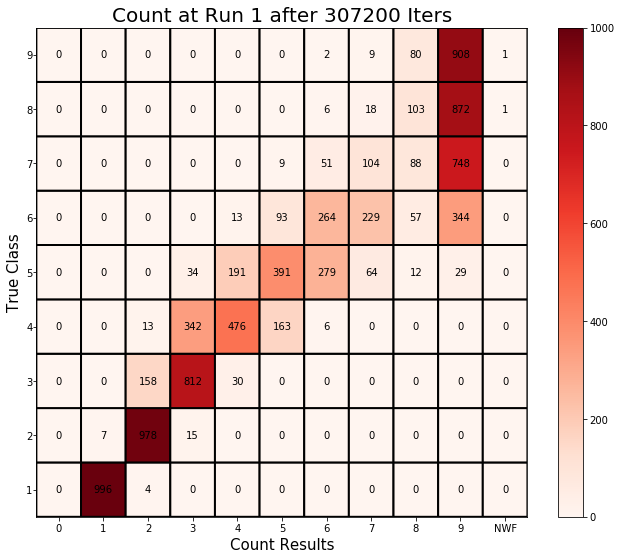

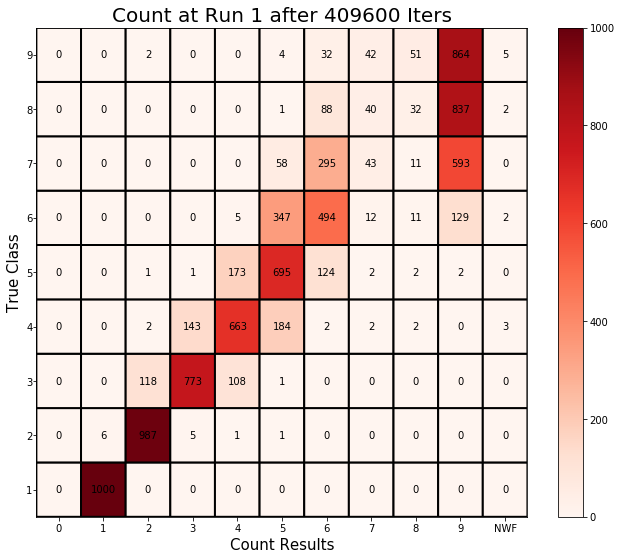

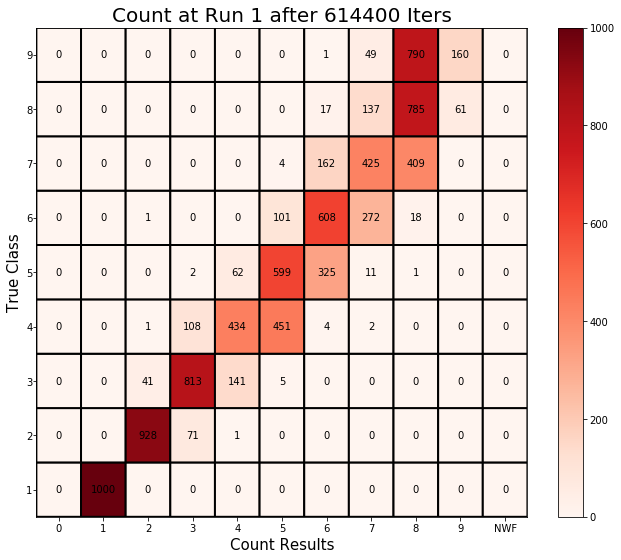

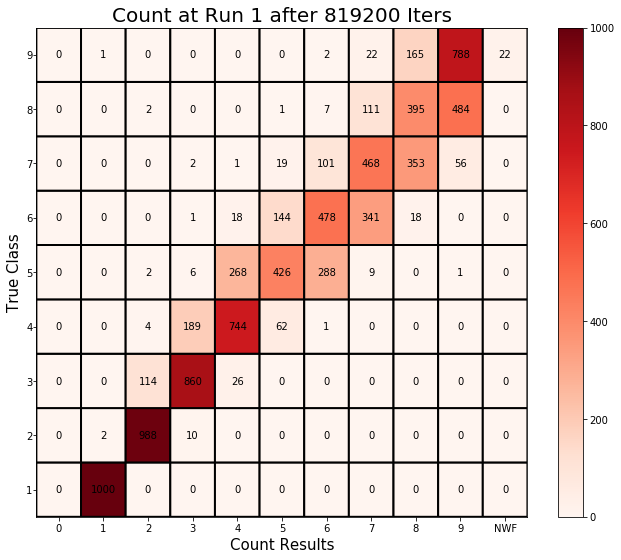

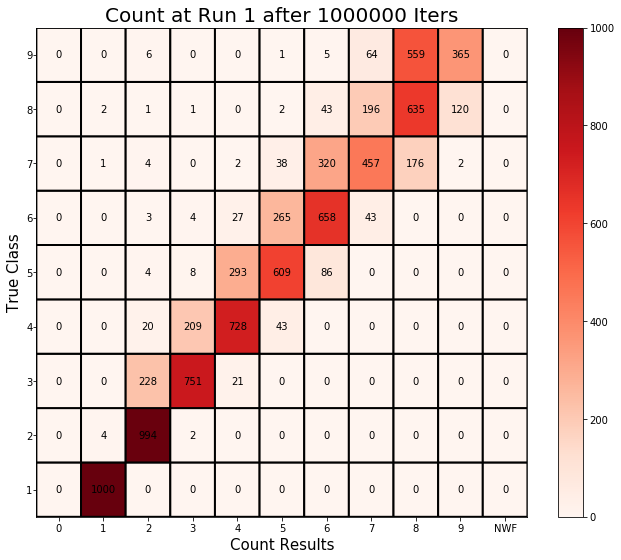

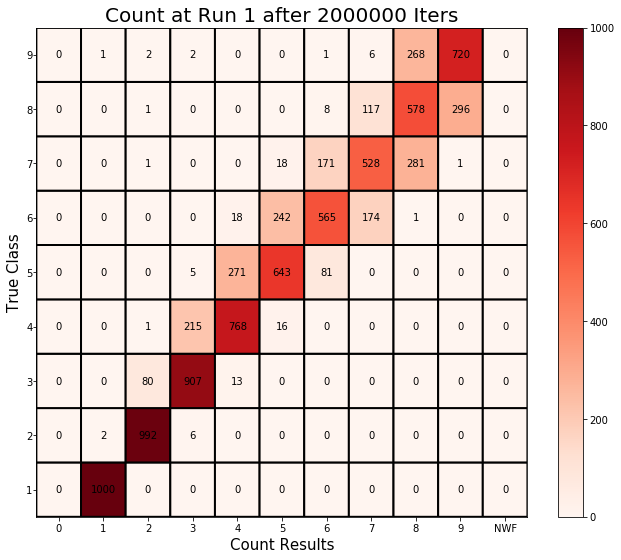

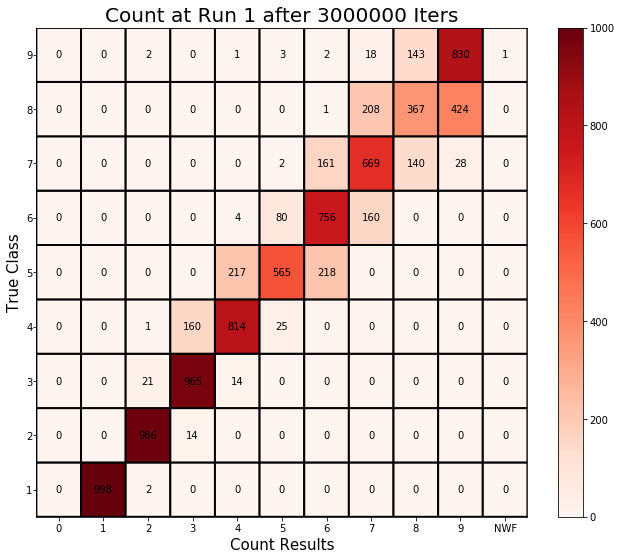

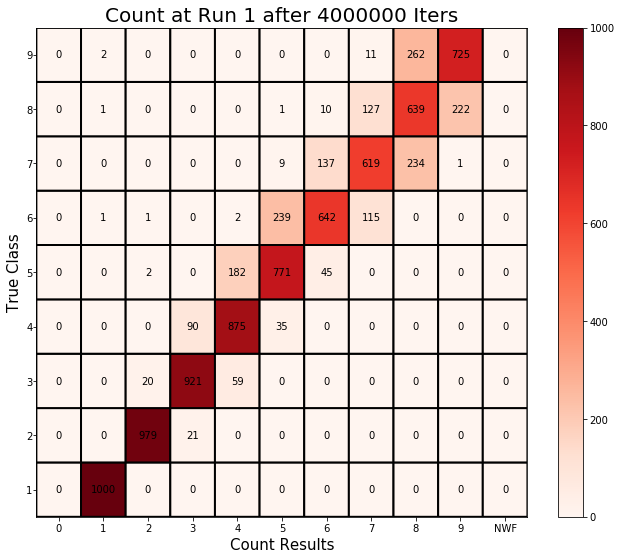

In [11]:
for run in range(num_runs):
    for it in range(num_iters):
        plot_count_results_wv(run,it)

In [12]:
def adj_all_runs(all_runs_matrix):
    """Adjust all the matrices so tick marks start with 1."""
    
    new_all_runs_matrix = np.zeros([num_runs, num_iters, output_size-1, num_glimpses+1, 1, output_size])
    for m, matrix in enumerate(all_runs_matrix):
        for i in range(num_iters):
            for g in range(num_glimpses):
                new_all_runs_matrix[m, i, g] = adj_matrix(matrix[i, g])
    return new_all_runs_matrix


def adj_matrix(matrix):
    """Adjust the matrix so tick marks start with 1."""
    
    a = np.zeros([1, output_size])
    temp = np.vstack((a, matrix))
    b = np.zeros([output_size + 1, 1])
    new_matrix = np.hstack((b, temp))
    return new_matrix


confidence_all_runs_adj = confidence_all_runs#adj_all_runs(confidence_all_runs)
choice_all_runs_adj = choice_all_runs#adj_all_runs(choice_all_runs)

In [13]:
confidence_avg = np.mean(confidence_all_runs_adj, axis=0)
choice_avg = np.mean(choice_all_runs_adj, axis=0)
confidence_avg[5,0,0,0]
np.argmax(confidence_all_runs[0,0])
#confidence_all_runs[0,0]

128

In [14]:
def plot_confidence(iter_idx, it, num_blobs, run=None):
    """Plot the confidence heatmap."""
    
    if run is None:
        matrix = np.zeros([10,10])
        for g in range (10):
            matrix[:,g] = confidence_avg[iter_idx, num_blobs, g, 0]
        plot_title = "%d Blobs:Confidence after %d Iters" % (num_blobs+1, it)

    else:
        matrix = np.zeros([10,10])
        for g in range (10):
            matrix = confidence_all_runs_adj[run, iter_idx, num_blobs, g, 0]
        plot_title = "%d Blobs:Confidence at Run %d after %d Iters" % (num_blobs+1, run + 1, it)
    plot_heatmap(matrix, num_blobs, plot_title)


def plot_choice(iter_idx, it, num_blobs, run=None):
    """Plot the choice heatmap."""
    
    if run is None:
        matrix = np.zeros([10,10])
        for g in range (10):
            matrix[:,g] = choice_avg[iter_idx, num_blobs, g, 0]
        plot_title = "%d Blobs:Choice after %d Iterations" % (num_blobs+1, it)
    else:
        matrix = np.zeros([10,10])
        for g in range (10):
            matrix = choice_all_runs_adj[run, iter_idx, num_blobs, g, 0]
        plot_title = "%d Blobs:Choice at Run %d after %d Iterations" % (num_blobs+1, run + 1, it)
    plot_heatmap(matrix, num_blobs, plot_title)
    
    
def plot_heatmap(matrix, num_blobs, plot_title):
    """Plot heatmap."""
    
    data = [go.Heatmap(
        z=matrix,
        colorscale="Jet"
    )]

    layout = go.Layout(
        title=plot_title,
        yaxis=dict(
#             range=[max_blobs + m, min_blobs - m],
            range=[0 - m, 9 + m],
            title="Count Word",
            dtick=1,
            tickcolor='#FFF'
        ),
        xaxis=dict(
            range=[0 - m, 9 + m],
            title="Glimpses",
            dtick=1,
            tickcolor='#FFF'
        ),
        width=400,
        height=400,
        plot_bgcolor="#000",
        paper_bgcolor="#000",
        font=dict(
            color="#FFF"
        ),
        titlefont=dict(
            color="#FFF"
        ),
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [15]:
#for n, num in enumerate(blob_list):
    #for i, it in enumerate(iter_list):
        #plot_confidence(i, it, num)
        #plot_choice(i, it, num)

In [16]:
for n, num in enumerate(blob_list): 
    #for i, it in enumerate(iter_list):
    plot_confidence(15, 819200, num)
    #plot_choice(i, it, num)

IndexError: index 9 is out of bounds for axis 1 with size 9

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

F = plt.figure(1, (28,28))
F.clf()

ZS = np.zeros([num_iters*(output_size-1),10,10])
extent = (0, 10, 0, 10) 
    
matrix = np.zeros([10, 10])
for num_blobs in range (output_size-1):
    for iter_idx in range (num_iters):
        for g in range (10):
            matrix[:,g] = confidence_avg[iter_idx, num_blobs, g, 0]
            ZS[iter_idx+num_iters*num_blobs] = matrix

extent = extent[0], extent[1], extent[2], extent[3] 

grid = ImageGrid(F, 212,
                 nrows_ncols=(output_size-1, num_iters),
                 direction="row",
                 axes_pad=0.05,
                 add_all=True,
                 label_mode="1",
                 share_all=True,
                 cbar_location="right",
                 cbar_mode="single",
                 cbar_size="5%",
                 cbar_pad=0.05,
                 )

grid[0].set_xlabel("Glimpse")
grid[0].set_ylabel("Count Word")

vmax, vmin = np.max(ZS), np.min(ZS)
import matplotlib.colors
norm = matplotlib.colors.Normalize(vmax=vmax, vmin=vmin)

for ax, im_title in zip(grid, ["iter=0", "400", "800", "1600", "3200", "6400", "12800", "25600", "51200", "102400", "153600", "204800", "307200", "409600", "614400", "819200"]):
    ax.set_title(im_title)
    ax.patch.set_alpha(0.5)
        
for ax, z in zip(grid, ZS):
    im = ax.imshow(z, norm=norm,
                   origin="lower", extent=extent,
                   interpolation="nearest")

# With cbar_mode="single", cax attribute of all axes are identical.
ax.cax.colorbar(im)
ax.cax.toggle_label(True)

grid[0].set_xticks([1,2,3,4,5,6,7,8,9,10])
grid[0].set_yticks([0,1,2,3,4,5,6,7,8,9])
plt.draw()
plt.show()